<a href="https://colab.research.google.com/github/GopiMindgloer/Learning-ML/blob/master/Air_Passengers_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Air Passengers Prediciton

In [0]:
#import libraries
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [3]:
#import file
from google.colab import files
files.upload()

Saving AirPassengers.csv to AirPassengers.csv


{'AirPassengers.csv': b'Month,#Passengers\n1949-01,112\n1949-02,118\n1949-03,132\n1949-04,129\n1949-05,121\n1949-06,135\n1949-07,148\n1949-08,148\n1949-09,136\n1949-10,119\n1949-11,104\n1949-12,118\n1950-01,115\n1950-02,126\n1950-03,141\n1950-04,135\n1950-05,125\n1950-06,149\n1950-07,170\n1950-08,170\n1950-09,158\n1950-10,133\n1950-11,114\n1950-12,140\n1951-01,145\n1951-02,150\n1951-03,178\n1951-04,163\n1951-05,172\n1951-06,178\n1951-07,199\n1951-08,199\n1951-09,184\n1951-10,162\n1951-11,146\n1951-12,166\n1952-01,171\n1952-02,180\n1952-03,193\n1952-04,181\n1952-05,183\n1952-06,218\n1952-07,230\n1952-08,242\n1952-09,209\n1952-10,191\n1952-11,172\n1952-12,194\n1953-01,196\n1953-02,196\n1953-03,236\n1953-04,235\n1953-05,229\n1953-06,243\n1953-07,264\n1953-08,272\n1953-09,237\n1953-10,211\n1953-11,180\n1953-12,201\n1954-01,204\n1954-02,188\n1954-03,235\n1954-04,227\n1954-05,234\n1954-06,264\n1954-07,302\n1954-08,293\n1954-09,259\n1954-10,229\n1954-11,203\n1954-12,229\n1955-01,242\n1955-02,

In [0]:
dataset = pd.read_csv('AirPassengers.csv')
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format = True)

In [20]:
#Setting the Month column as index
dataset = dataset.set_index(['Month'])
dataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


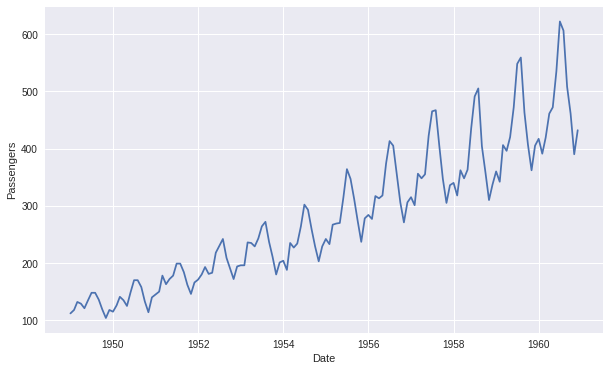

In [8]:
#pllotting a graph
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.plot(dataset)
plt.show()

In [0]:
#Determine rolling statistics
rolmean = dataset.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = dataset.rolling(window=12).std()
print(rolmean,rolstd)



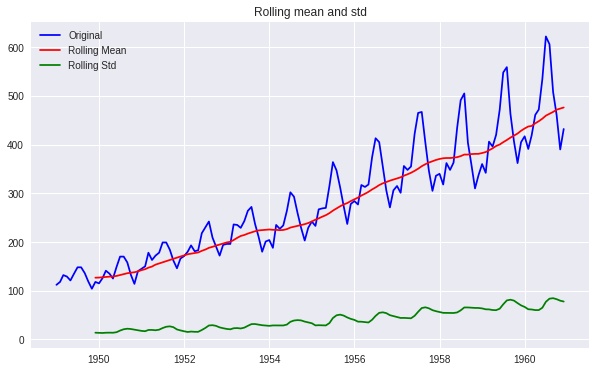

In [22]:
#plot rollling mean
original = plt.plot(dataset, color = 'Blue', label = 'Original')
mean = plt.plot(rolmean,color = 'Red', label = 'Rolling Mean')
std = plt.plot(rolstd, color='Green', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling mean and std')
plt.show(block = False)

 For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so.
 

In [26]:
#perform Augmented Dicky-Fuller Test
print('Result of Augmented Dicky-Fuller Test :')
dftest = adfuller(dataset['#Passengers'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4],index = ['Test Statistics', 'Pvalue', 'lags used','Number of observations used'])
for key,value in dftest[4].items():
  dfoutput['Critial value(%s)'%key] = value
  
print(dfoutput)

Result of Augmented Dicky-Fuller Test :
Test Statistics                  0.815369
Pvalue                           0.991880
lags used                       13.000000
Number of observations used    130.000000
Critial value(1%)               -3.481682
Critial value(5%)               -2.884042
Critial value(10%)              -2.578770
dtype: float64


For a time series to be stationary its ADCF test should have :

         1) A low pvalue(null hypothetically)
         2)The critical values at 1%,5%,10% confidence intervals should be as close as possible to theTest Statistics
         
         From the ADCF test we can see that the pvalue is not low and the critical values at the confidence intervals are not equal to the test statistics.
         
         We can convert the data to be stationary by taking square, squaroot, log etc.

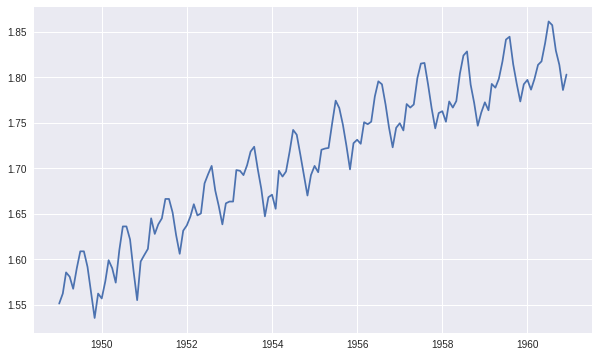

In [28]:
#log transformation
dataset['#Passengers']  = np.log(dataset['#Passengers'])
plt.plot(dataset)
plt.show()

In [0]:
#finding rolling avg and std again
rolmean = 